# Biomarcadores de Persecución Suave

## Configuración del ambiente

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8]

## Carga del Estudio y la Prueba

In [2]:
from bsp.core import load_study
from bsp.core.biomarkers import PursuitBiomarkers
from bsp.core.helpers import scale_signal, center_signal, move
from bsp.core.denoising import denoise_35

study = load_study("data/prueba2.bsp")

to_cut = 100
pursuit = study[1]
biomarkers = PursuitBiomarkers(
    test=pursuit,
    to_cut=100,
    invert_signal=True,
)

# Vamos a operar esta vez con la señal cruda para utilizar toda la información
# posible y controlar mejor el efecto de los algoritmos

horizontal_channel = denoise_35(center_signal(scale_signal(pursuit.hor_channel_raw[to_cut:-to_cut] * -1, pursuit.angle)))
stimuli_channel = center_signal(scale_signal(pursuit.hor_stimuli_raw[to_cut:-to_cut], pursuit.angle))
time_channel = np.arange(len(horizontal_channel)) / 1000.0

## Graficación de los biomarcadores

### Error Medio Cuadrático de la diferencia de formas de onda

Text(0, 0.5, 'Angle (°)')

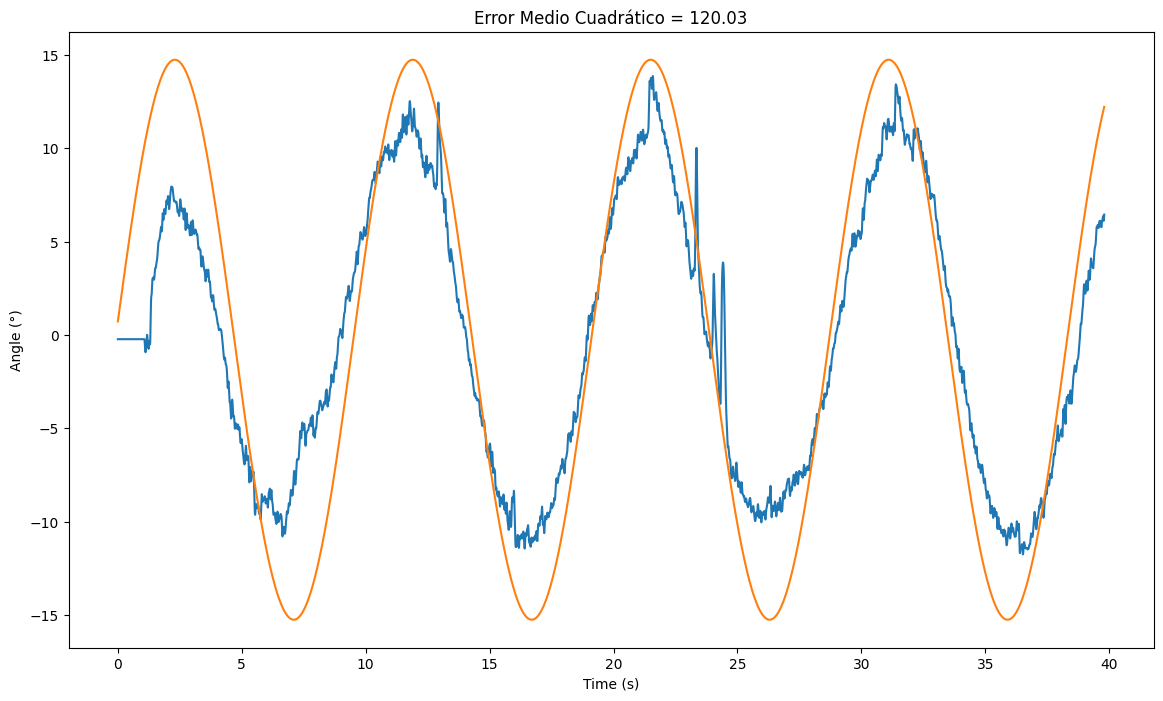

In [23]:
displacement, error = biomarkers.waveform_mse

displaced_horizontal_channel = move(horizontal_channel, displacement)
plt.title(f"Error Medio Cuadrático = {error:.2f}")
plt.plot(time_channel, displaced_horizontal_channel)
plt.plot(time_channel, stimuli_channel)
plt.xlabel("Time (s)")
plt.ylabel("Angle (°)")

### Latencia Media

Text(28.942, 0, 'latencia')

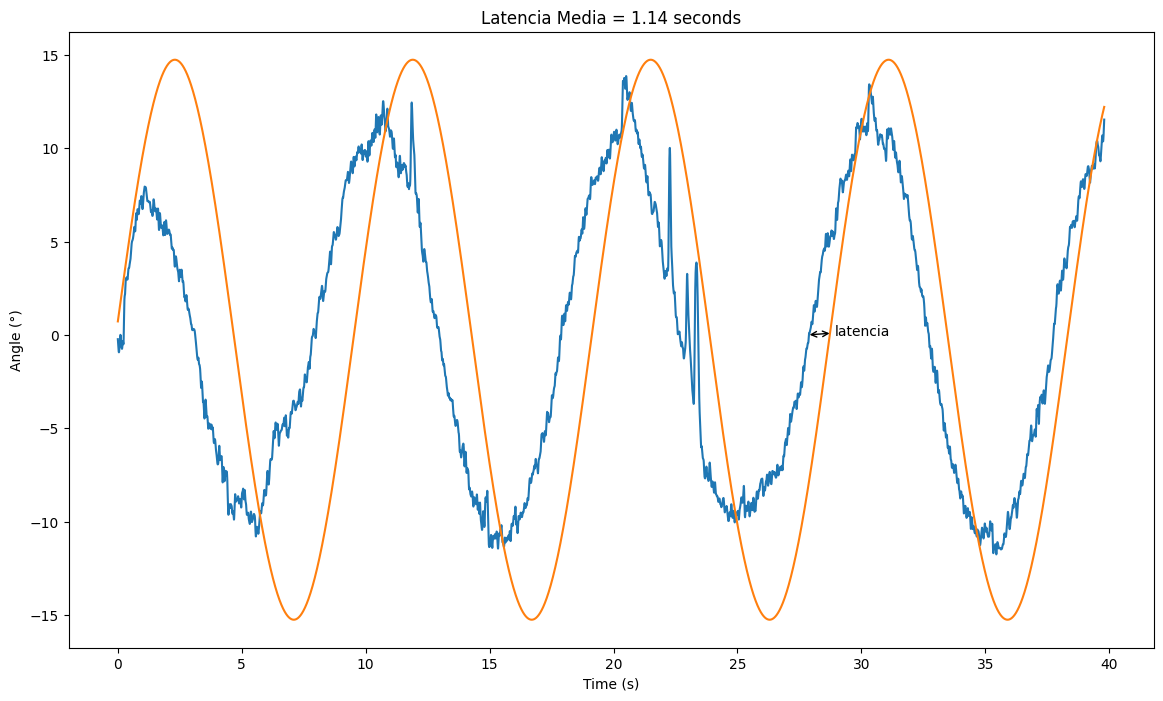

In [43]:
latency_mean = biomarkers.latency_mean

START = 27.8

plt.title(f"Latencia Media = {latency_mean:.2f} seconds")
plt.plot(time_channel, horizontal_channel)
plt.plot(time_channel, stimuli_channel)
plt.xlabel("Time (s)")
plt.ylabel("Angle (°)")
plt.annotate(
    text='latencia', 
    xy=(START, 0), 
    xytext=(START + latency_mean, 0), 
    arrowprops=dict(arrowstyle='<->'),
)

### Cantidad de Sácadas Correctivas

3
22269 22576
23208 23344
23344 23561


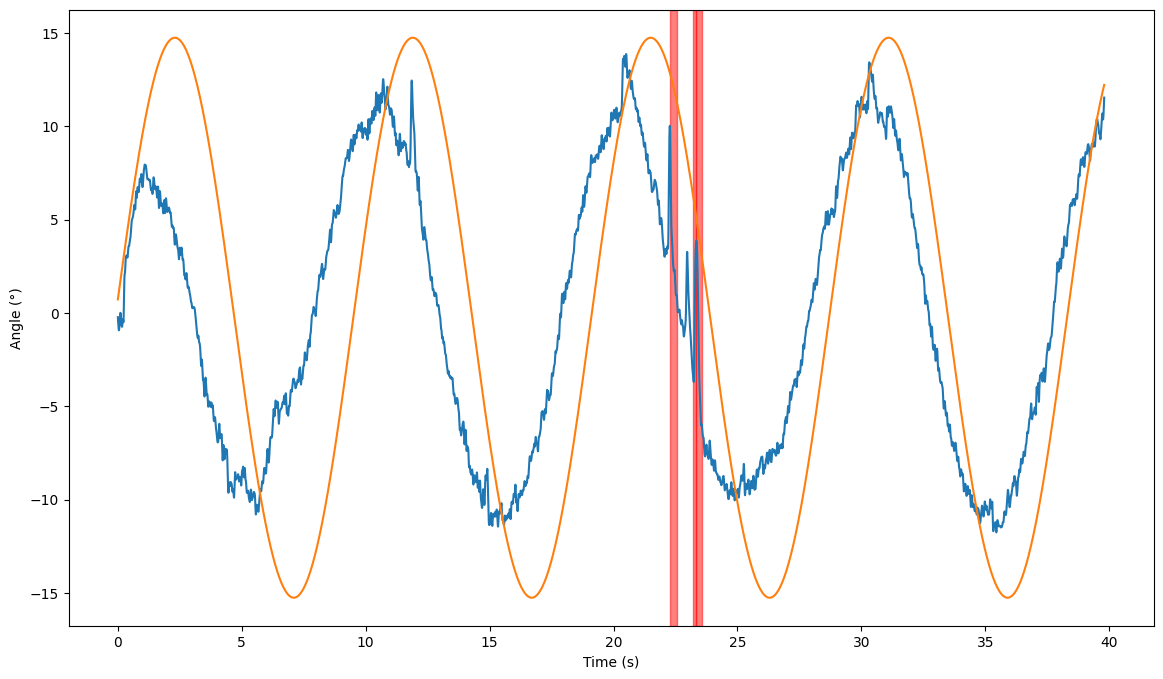

In [5]:
corrective_saccades_count = biomarkers.corrective_saccades_count
plt.plot(time_channel, horizontal_channel)
plt.plot(time_channel, stimuli_channel)
plt.xlabel("Time (s)")
plt.ylabel("Angle (°)")

print(corrective_saccades_count)
for saccade in biomarkers.saccades:
    print(saccade.onset, saccade.offset)
    plt.axvspan(
        time_channel[saccade.onset], 
        time_channel[saccade.offset],
        color='r',
        alpha=0.5,
    )